In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from math import sqrt, exp
import numpy as np
import cv2 as cv

In [3]:
# Відстань між двома точками 
def distance(point1, point2):
    return sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Ідеальний низькочастотний фільтр 
def idealFilterLP(D0, imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows / 2, cols / 2)
    for x in range(cols):
        for y in range(rows):
            if distance((y, x), center) < D0:
                base[y, x] = 1
    return base
    
# Виконання низькочастотної фільтрації за допомогою ідеального фільтру 
def lowPassFiltering(img, D0):
    original = np.fft.fft2(img)
    center = np.fft.fftshift(original)
    LowPassCenter = center * idealFilterLP(D0, img.shape)
    LowPass = np.fft.ifftshift(LowPassCenter)
    inverse_LowPass = np.fft.ifft2(LowPass)
    return np.abs(inverse_LowPass) 

In [4]:
img = cv.imread('assets/baloons.jpg', 0)
img

array([[108,  98,  98, ...,  95,  94, 106],
       [ 99,  89,  88, ...,  84,  83,  95],
       [ 98,  89,  88, ...,  82,  81,  94],
       ...,
       [202, 198, 193, ..., 167, 169, 173],
       [194, 193, 192, ..., 167, 169, 173],
       [200, 199, 198, ..., 173, 175, 179]], dtype=uint8)

In [5]:
D0 = 80
filtered_img = lowPassFiltering(img, D0)

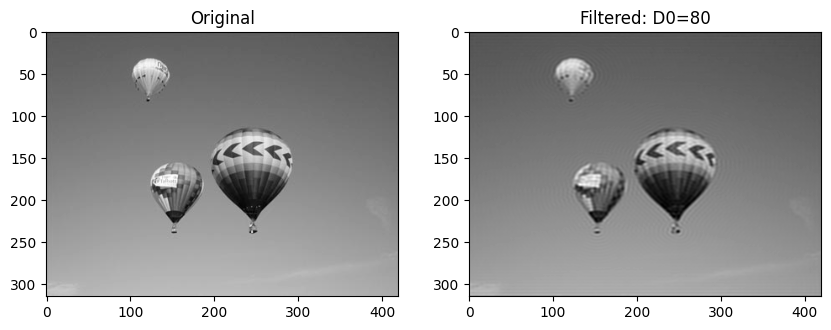

In [6]:
plt.figure(figsize=(10, 5)) 
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title("Original") 
plt.subplot(122), plt.imshow(filtered_img, cmap='gray'), plt.title("Filtered: D0={}".format(D0)) 
plt.show() 

In [7]:
D0 = 30
filtered_img = lowPassFiltering(img, D0)

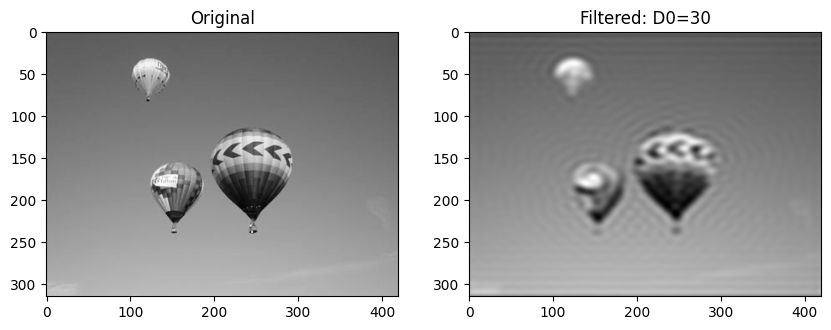

In [8]:
plt.figure(figsize=(10, 5)) 
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title("Original") 
plt.subplot(122), plt.imshow(filtered_img, cmap='gray'), plt.title("Filtered: D0={}".format(D0)) 
plt.show() 